In [93]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Check if NLTK is installed
try:
    import nltk
except:
    !pip install nltk  
    import nltk
    
# Check if nltk is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Please follow instruction on your screen to start downloading NLTK packages")
    nltk.download('punkt')
    
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

In [96]:
#Reading data from CSV
data1 = pd.read_csv('1429_1.csv', low_memory=False)
data1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


We first want to omit the variables that are redundant, this leaves us with 9 variables:

id,name,categories,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title

In [97]:
#reviewing the dataset and combining all in review 
data1.info()
data1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [98]:
data1['reviews.rating'].value_counts()#counting reveiw rating according to stars 

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [99]:
#Adding data to balance the rating to remove the bias 
data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]
data3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]

In [100]:
print(data2['reviews.rating'].value_counts())#Counting ratings according to stars given from data data source 2
print(data3['reviews.rating'].value_counts())#Counting ratings according to stars given from data source 3

3    1206
1     965
2     616
Name: reviews.rating, dtype: int64
5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64


In [101]:
#Adding review rating to values less than 3 to make data less bias  
data2 = data2[data2["reviews.rating"]<=3]#
data3 = data3[data3["reviews.rating"]<=3]

In [102]:
data=pd.concat([data1, data2, data3])# Combining the reveiw ratings  

In [103]:
df=pd.concat([data['reviews.text'],data['reviews.rating']], axis=1)
df.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [104]:
df['reviews.rating'].value_counts()# Counting the values after adding data 

5.0    23775
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

<AxesSubplot:>

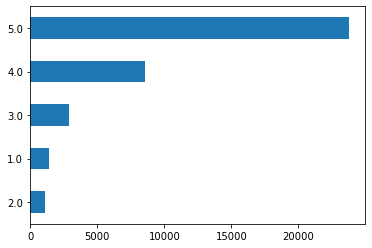

In [105]:
reveiw_rate=df['reviews.rating'].value_counts()
#Ploting the review rating counts 
df['reviews.rating'].value_counts().sort_values().plot(kind = 'barh')

In [106]:
df.dropna(inplace=True)
df.reset_index()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37727 entries, 0 to 4975
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    37727 non-null  object 
 1   reviews.rating  37727 non-null  float64
dtypes: float64(1), object(1)
memory usage: 884.2+ KB


In [107]:
#Dividing the reviews in sentiment according to the rating 
sentiment = {1: 1,
            2: 1,
            3: 0,
            4: -1,
            5: -1}
df['sentiment']=df['reviews.rating'].map(sentiment)

In [108]:
df['sentiment'].value_counts()
#0:Neutal
#1:Positive
#-1: Negative


-1    32315
 0     2902
 1     2510
Name: sentiment, dtype: int64

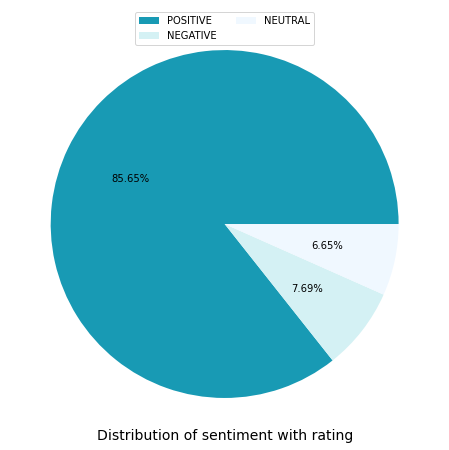

In [109]:
# distribution of sentiment
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE','NEUTRAL']
colors = ['#189AB4', '#D4F1F4','#F0F8FF']
plt.pie(df['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment with rating', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [110]:
df=df.head(10000)
df['reviewText'] = df['reviews.text'].str.lower()

# Using VADER Sentiment Analysis (Lexicon Method)

VADER_Accuracy: 0.0579


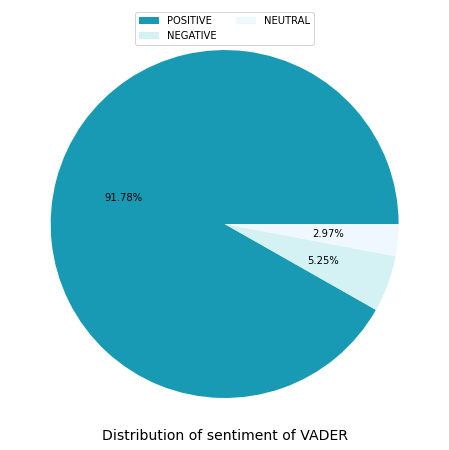

In [112]:
# VADER sentiment analysis tool for getting pos, neg and neu.
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score
eng_snt_score =  []

for comment in df['reviews.text'].to_list():
    snts_score = sentimental(comment)
    eng_snt_score.append(snts_score)
df['sentiment_score'] = np.array(eng_snt_score)

i = 0
vader_sentiment = [ ]
while(i<len(df)):
    if ((df.iloc[i]['sentiment_score'] >= 0.05)):
        vader_sentiment.append('positive')
        i = i+1
    elif ((df.iloc[i]['sentiment_score'] > -0.05) & (df.iloc[i]['sentiment_score'] < 0.05)):
        vader_sentiment.append('neutral')
        i = i+1
    elif ((df.iloc[i]['sentiment_score'] <= -0.05)):
        vader_sentiment.append('negative')
        i = i+1
df['vader_sentiment_labels'] = vader_sentiment
df['actual_label'] = df['sentiment']
df['predicted_label'] = df['vader_sentiment_labels'].map({'positive': 1, 'neutral': 0, 'negative':-1})
y_act = df['actual_label'].values
y_pred = df['predicted_label'].values
print('VADER_Accuracy:',accuracy_score(y_act, y_pred))#accuracy prediction 
# Creating plot
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE','NEUTRAL']
colors = ['#189AB4', '#D4F1F4','#F0F8FF']
plt.pie(df['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment of VADER', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()







  

# Preprocessing of Data 

# Bag of words using CountVectorizer

In [113]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['reviews.text'])

# Splitting the data into training and testing set.

In [116]:
y=df["sentiment"].values
X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size = 0.20, random_state = 42)
train_acc=[]
test_acc=[]

# Function for ML models 

In [117]:

#Dict holding the F1 accuracies of different models 
F1_accuracy= {}
#This function calculates the accuracies of the different models
def findacuuracy_CounterVec(model,X_train, X_test, y_train, y_test, model_type):
    train_acc=[]
    test_acc=[]
    
    if model==LogisticRegression:
        model=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
    else:
        model=model()
    model_metric=model.fit(X_train,y_train)
    score_train= (model.score(X_train, y_train))*100
    score_test= (model.score(X_test, y_test))*100
    train_accuracy=model.score(X_train, y_train)*100
    test_accuracy=model.score(X_test, y_test)*100
    F1=f1_score(y_test, model.predict(X_test), average='weighted')
    
    print('Train accuracy :', train_accuracy)
    print('Test accuracy :', test_accuracy)
    print('F1 score:',F1 )
    print('\nCLASSIFICATION REPORT')
    print(classification_report(y_test, model.predict(X_test)))
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round( model.predict(X_test)), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (8,8))
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix' ) 
    F1_accuracy[model_type] = F1

    

# Logistic Regression

[LibLinear]Train accuracy : 98.2375
Test accuracy : 90.55
F1 score: 0.8906221601516502

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      1843
           0       0.19      0.11      0.14        95
           1       0.42      0.18      0.25        62

    accuracy                           0.91      2000
   macro avg       0.51      0.42      0.45      2000
weighted avg       0.88      0.91      0.89      2000



{'LogisticRegression': 0.8906221601516502}

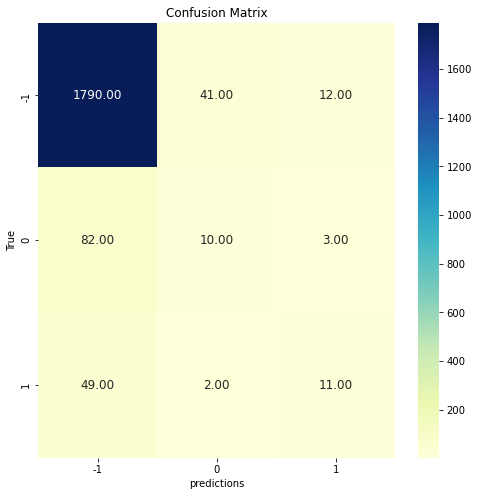

In [118]:

findacuuracy_CounterVec(LogisticRegression,X_train, X_test, y_train, y_test, "LogisticRegression")
F1_accuracy


# Multinomial Naive Bayes

Train accuracy : 93.3875
Test accuracy : 90.9
F1 score: 0.8914860481845172

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95      1843
           0       0.16      0.08      0.11        95
           1       0.50      0.15      0.23        62

    accuracy                           0.91      2000
   macro avg       0.53      0.40      0.43      2000
weighted avg       0.88      0.91      0.89      2000



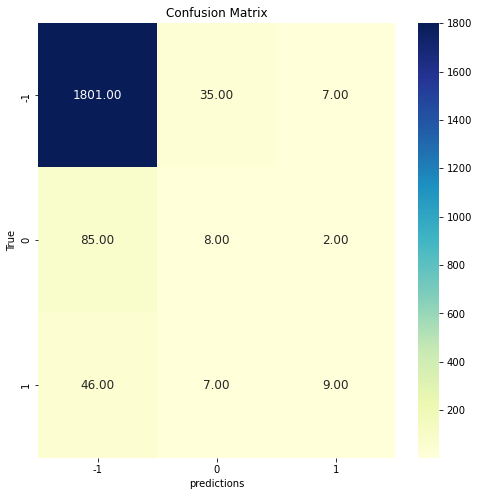

In [119]:
findacuuracy_CounterVec(MultinomialNB,X_train, X_test, y_train, y_test,"MultinomialNB")




# Bernoulli Naive Bayes

Train accuracy : 90.4625
Test accuracy : 89.75
F1 score: 0.8827963769400701

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      1843
           0       0.16      0.11      0.13        95
           1       0.17      0.06      0.09        62

    accuracy                           0.90      2000
   macro avg       0.42      0.38      0.39      2000
weighted avg       0.87      0.90      0.88      2000



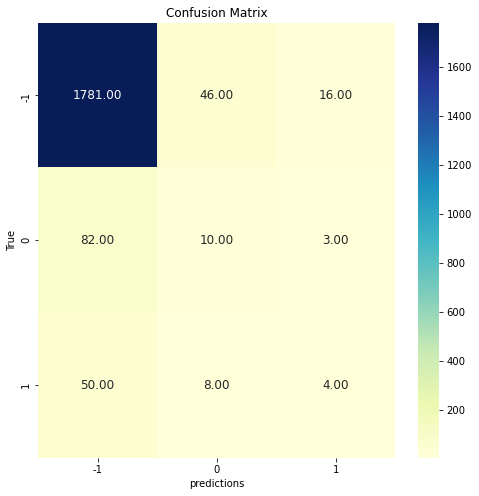

In [120]:
findacuuracy_CounterVec(BernoulliNB,X_train, X_test, y_train, y_test,"BernoulliNB")


Train accuracy : 99.97500000000001
Test accuracy : 92.2
F1 score: 0.88506767721838

CLASSIFICATION REPORT


C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.92      1.00      0.96      1843
           0       0.00      0.00      0.00        95
           1       1.00      0.02      0.03        62

    accuracy                           0.92      2000
   macro avg       0.64      0.34      0.33      2000
weighted avg       0.88      0.92      0.89      2000



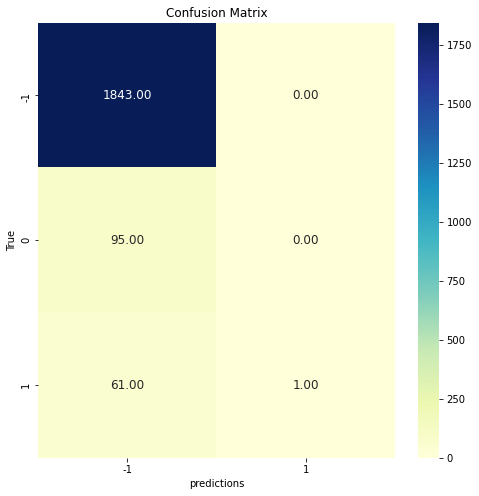

In [121]:
findacuuracy_CounterVec(RandomForestClassifier,X_train, X_test, y_train, y_test,"RandomForestClassifier")



# Vectorizing the array using TF-IDF 

In [122]:
tf=TfidfVectorizer()
df
text_tf= tf.fit_transform(df['reviews.text'])

In [123]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(text_tf,df["sentiment"].values, test_size=0.3, random_state=1)

# Random Forests

Train accuracy : 99.9857142857143
Test accuracy : 91.76666666666667
F1 score: 0.8787376260511719

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96      2752
           0       0.00      0.00      0.00       169
           1       0.50      0.01      0.02        79

    accuracy                           0.92      3000
   macro avg       0.47      0.34      0.33      3000
weighted avg       0.86      0.92      0.88      3000



C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


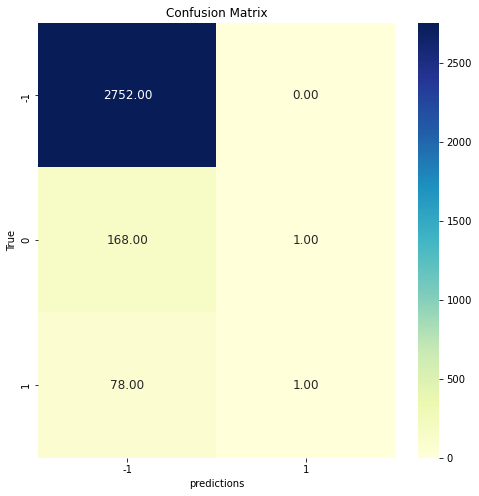

In [124]:

findacuuracy_CounterVec(RandomForestClassifier,X_train, X_test, y_train, y_test,"RandomForestClassifier_TF-IDF")



# MultinomialNB

Train accuracy : 91.81428571428572
Test accuracy : 91.73333333333333
F1 score: 0.8777821047751507

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96      2752
           0       0.00      0.00      0.00       169
           1       0.00      0.00      0.00        79

    accuracy                           0.92      3000
   macro avg       0.31      0.33      0.32      3000
weighted avg       0.84      0.92      0.88      3000



C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mansi Tomar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


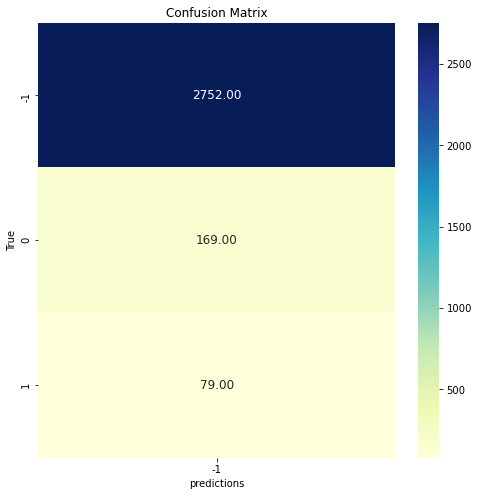

In [125]:
findacuuracy_CounterVec(MultinomialNB,X_train, X_test, y_train, y_test,"MultinomialNB_TF-IDf")


# LogisticRegression

[LibLinear]Train accuracy : 94.62857142857143
Test accuracy : 92.0
F1 score: 0.8892201190155529

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96      2752
           0       0.50      0.04      0.08       169
           1       0.53      0.11      0.19        79

    accuracy                           0.92      3000
   macro avg       0.65      0.38      0.41      3000
weighted avg       0.89      0.92      0.89      3000



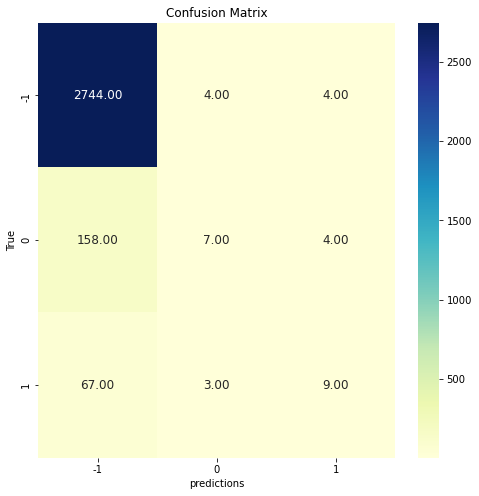

In [126]:
findacuuracy_CounterVec(LogisticRegression,X_train, X_test, y_train, y_test,"LogisticRegression_TF-IDF")


# BernoulliNB

Train accuracy : 90.15714285714286
Test accuracy : 88.16666666666667
F1 score: 0.8707670966986981

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          -1       0.92      0.95      0.94      2752
           0       0.14      0.12      0.13       169
           1       0.26      0.08      0.12        79

    accuracy                           0.88      3000
   macro avg       0.44      0.38      0.39      3000
weighted avg       0.86      0.88      0.87      3000



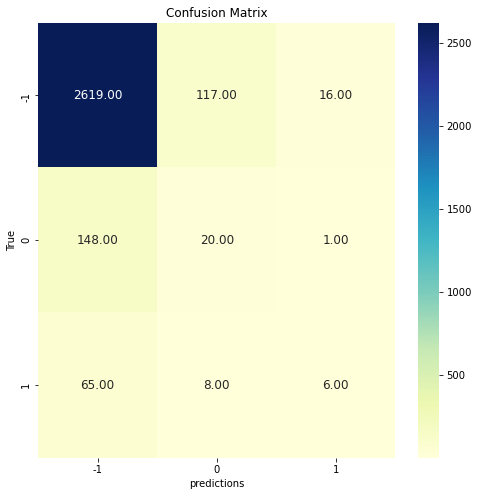

In [127]:
 findacuuracy_CounterVec(BernoulliNB,X_train, X_test, y_train, y_test,"BernoulliNB_TF-IDF")

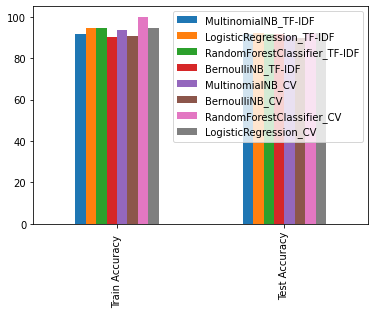

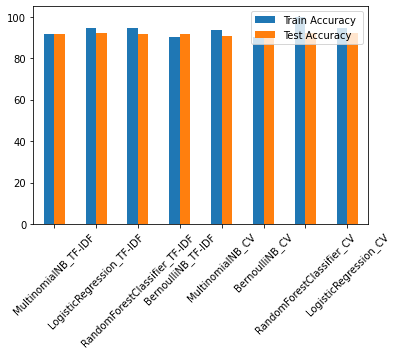

In [130]:

train_acc=[91.81428571428572,94.62857142857143,94.62857142857143,90.15714285714286,93.3875,90.4625,99.97500000000001,94.62857142857143]
test_acc=[91.73333333333333,92.0,91.73333333333333,91.73333333333333,90.9,89.75,92.15,92.0]
Models = ['MultinomialNB_TF-IDF','LogisticRegression_TF-IDF','RandomForestClassifier_TF-IDF','BernoulliNB_TF-IDF','MultinomialNB_CV','BernoulliNB_CV','RandomForestClassifier_CV','LogisticRegression_CV']
df = pd.DataFrame({'Train Accuracy ': train_acc,
                    'Test Accuracy': test_acc}, index=Models)
ax = df.T.plot.bar(orientation='vertical')
bx=df.plot.bar(orientation='vertical')
for tick in bx.get_xticklabels():
    tick.set_rotation(45)

# Plotting F1 accuracy

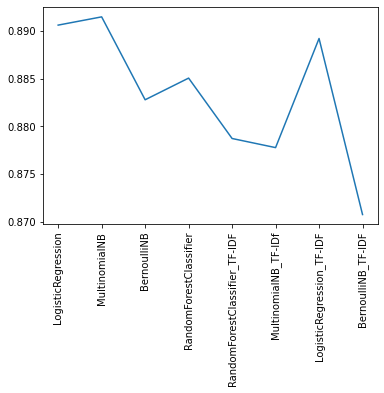

In [151]:
plt.plot(*zip(*F1_accuracy.items()))
plt.xticks(rotation=90)
plt.show()